# Chapter 5 - Combining dataframes and scraping Canadian weather data

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 3)
plt.rcParams['font.family'] = 'sans-serif'

# Summary

By the end of this chapter, we're going to have downloaded all of Canada's weather data for 2012, and saved it to a CSV. 

We'll do this by downloading it one month at a time, and then combining all the months together.

Here's the temperature every hour for 2012!

<Axes: xlabel='Date/Time'>

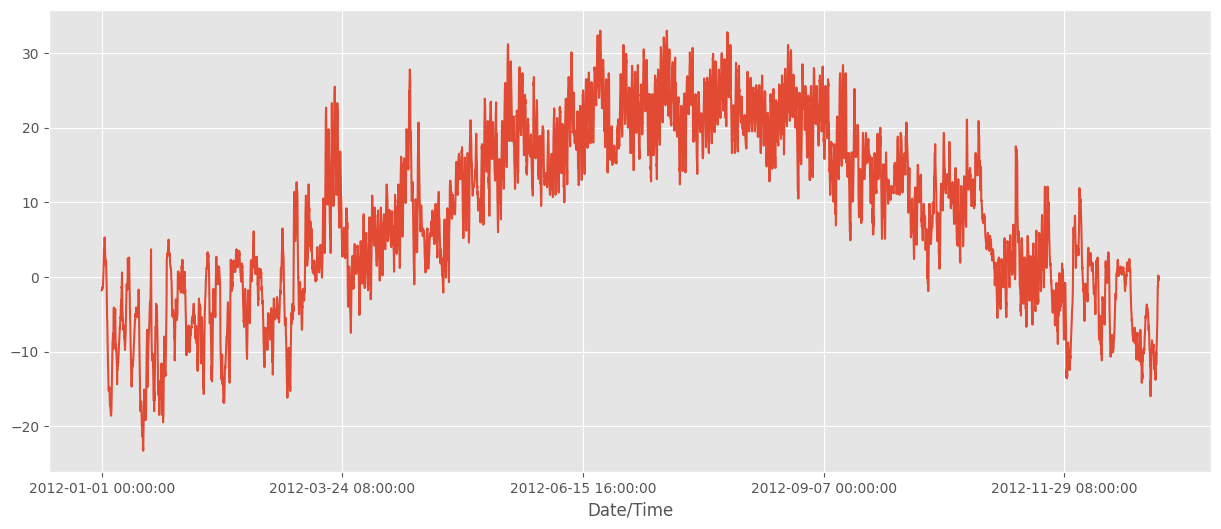

In [3]:
weather_2012_final = pd.read_csv('../data/weather_2012.csv', index_col='Date/Time')
weather_2012_final['Temp (C)'].plot(figsize=(15, 6))

## Downloading one month of weather data

When playing with the cycling data, I wanted temperature and precipitation data to find out if people like biking when it's raining. So I went to the site for [Canadian historical weather data](http://climate.weather.gc.ca/index_e.html#access), and figured out how to get it automatically.

Here we're going to get the data for March 2012, and clean it up

Here's an URL template you can use to get data in Montreal. 

In [4]:
url_template = "http://climate.weather.gc.ca/climate_data/bulk_data_e.html?format=csv&stationID=5415&Year={year}&Month={month}&timeframe=1&submit=Download+Data"

To get the data for March 2013, we need to format it with `month=3, year=2012`.

In [5]:
url = url_template.format(month=3, year=2012)
weather_mar2012 = pd.read_csv(url)

This is super great! We can just use the same `read_csv` function as before, and just give it a URL as a filename. Awesome.

Try to convert 'Date/Time (LST)' to dates and set 'Date/Time (LST)' to be the index column.

In [8]:
weather_mar2012['Date/Time (LST)'] = pd.to_datetime(weather_mar2012['Date/Time (LST)'], format = '%Y-%m-%d %H:%M')
weather_mar2012 = weather_mar2012.set_index('Date/Time (LST)')

In [9]:
weather_mar2012

,Unnamed: 0,Longitude (x),Latitude (y),Station Name,Climate ID,Year,Month,Day,Time (LST),Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time (LST),,,,,,,,,,,,,,,,
2012-03-01 00:00:00,0,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,3,1,00:00,-5.5,-9.7,72,24,4.0,100.97,Snow
2012-03-01 01:00:00,1,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,3,1,01:00,-5.7,-8.7,79,26,2.4,100.87,Snow
2012-03-01 02:00:00,2,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,3,1,02:00,-5.4,-8.3,80,28,4.8,100.80,Snow
2012-03-01 03:00:00,3,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,3,1,03:00,-4.7,-7.7,79,28,4.0,100.69,Snow
2012-03-01 04:00:00,4,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,3,1,04:00,-5.4,-7.8,83,35,1.6,100.62,Snow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-03-31 19:00:00,739,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,3,31,19:00,5.9,-8.0,36,4,25.0,100.88,Clear
2012-03-31 20:00:00,740,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,3,31,20:00,4.4,-7.2,43,9,25.0,100.85,Clear
2012-03-31 21:00:00,741,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,3,31,21:00,2.6,-6.3,52,7,25.0,100.86,Clear


Let's plot the temperature during March.

<Axes: xlabel='Date/Time (LST)'>

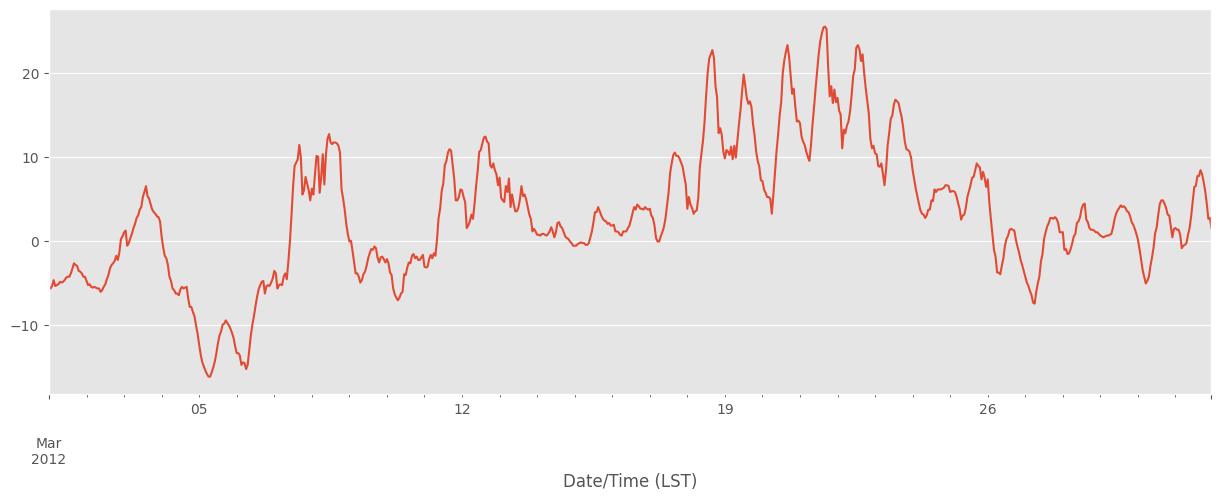

In [10]:
weather_mar2012[u"Temp (°C)"].plot(figsize=(15, 5))

Notice how it goes up to 25° C in the middle there? That was a big deal. It was March, and people were wearing shorts outside. 

And I was out of town and I missed it. Still sad, humans.

To not be disturbed by the degree character °. Try to rename the columns. 

In [12]:
weather_mar2012.columns

Index(['Unnamed: 0', 'Longitude (x)', 'Latitude (y)', 'Station Name',
       'Climate ID', 'Year', 'Month', 'Day', 'Time (LST)', 'Temp (°C)',
       'Dew Point Temp (°C)', 'Rel Hum (%)', 'Wind Spd (km/h)',
       'Visibility (km)', 'Stn Press (kPa)', 'Weather'],
      dtype='object')

In [13]:
weather_mar2012 = weather_mar2012.rename(columns = {'Temp (°C)' : 'Temp (C)','Dew Point Temp (°C)':'Dew Point Temp (C)'})
weather_mar2012.columns

Index(['Unnamed: 0', 'Longitude (x)', 'Latitude (y)', 'Station Name',
       'Climate ID', 'Year', 'Month', 'Day', 'Time (LST)', 'Temp (C)',
       'Dew Point Temp (C)', 'Rel Hum (%)', 'Wind Spd (km/h)',
       'Visibility (km)', 'Stn Press (kPa)', 'Weather'],
      dtype='object')

You'll notice in the summary above that there are a few columns which are are either entirely empty or only have a few values in them. Let's get rid of all of those with `dropna`.

The argument `axis=1` to `dropna` means "drop columns", not rows", and `how='any'` means "drop the column if any value is null". 

This is much better now -- we only have columns with real data.

In [14]:
weather_mar2012 = weather_mar2012.dropna(axis=1, how='any')
weather_mar2012[:5]

,Unnamed: 0,Longitude (x),Latitude (y),Station Name,Climate ID,Year,Month,Day,Time (LST),Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time (LST),,,,,,,,,,,,,,,,
2012-03-01 00:00:00,0,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,3,1,00:00,-5.5,-9.7,72,24,4.0,100.97,Snow
2012-03-01 01:00:00,1,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,3,1,01:00,-5.7,-8.7,79,26,2.4,100.87,Snow
2012-03-01 02:00:00,2,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,3,1,02:00,-5.4,-8.3,80,28,4.8,100.80,Snow
2012-03-01 03:00:00,3,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,3,1,03:00,-4.7,-7.7,79,28,4.0,100.69,Snow
2012-03-01 04:00:00,4,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,3,1,04:00,-5.4,-7.8,83,35,1.6,100.62,Snow


The Year/Month/Day/Time columns are redundant. Let's get rid of those.

The `axis=1` argument means "Drop columns", like before. The default for operations like `dropna` and `drop` is always to operate on rows.

In [15]:
weather_mar2012 = weather_mar2012.drop(['Year', 'Month', 'Day', 'Time (LST)'], axis=1)
weather_mar2012[:5]

,Unnamed: 0,Longitude (x),Latitude (y),Station Name,Climate ID,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time (LST),,,,,,,,,,,,
2012-03-01 00:00:00,0,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,-5.5,-9.7,72,24,4.0,100.97,Snow
2012-03-01 01:00:00,1,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,-5.7,-8.7,79,26,2.4,100.87,Snow
2012-03-01 02:00:00,2,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,-5.4,-8.3,80,28,4.8,100.80,Snow
2012-03-01 03:00:00,3,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,-4.7,-7.7,79,28,4.0,100.69,Snow
2012-03-01 04:00:00,4,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,-5.4,-7.8,83,35,1.6,100.62,Snow


Awesome! We now only have the relevant columns, and it's much more manageable.

## Plotting the median temperature by hour of day

This one's just for fun -- we've already done this before, using groupby and aggregate! We will learn whether or not it gets colder at night. Well, obviously. But let's do it anyway.

<bound method NDFrame.head of                      Temp (C)
Date/Time (LST)              
2012-03-01 00:00:00      -5.5
2012-03-01 01:00:00      -5.7
2012-03-01 02:00:00      -5.4
2012-03-01 03:00:00      -4.7
2012-03-01 04:00:00      -5.4
...                       ...
2012-03-31 19:00:00       5.9
2012-03-31 20:00:00       4.4
2012-03-31 21:00:00       2.6
2012-03-31 22:00:00       2.7
2012-03-31 23:00:00       1.5

[744 rows x 1 columns]>


<Axes: xlabel='Hour'>

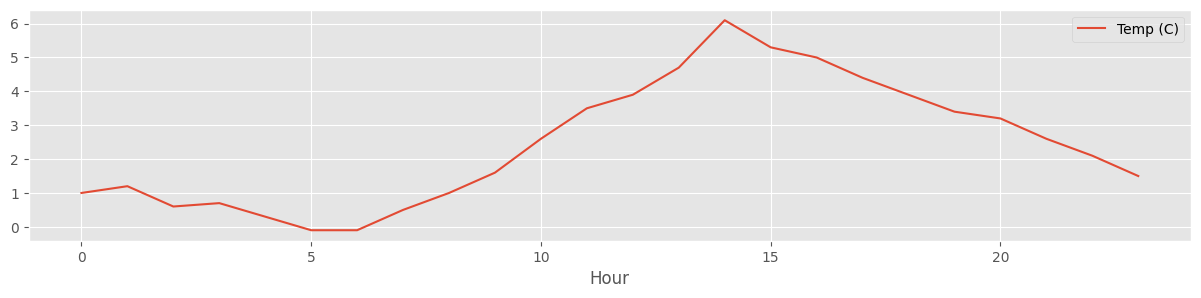

In [17]:
temperatures = weather_mar2012[[u'Temp (C)']].copy()
print(temperatures.head)
temperatures['Hour'] = weather_mar2012.index.hour
temperatures.groupby('Hour').aggregate("median").plot()

So it looks like the time with the highest median temperature is 2pm. Neat.

## Add another month

Let's summarize what we have done for the next month. 

In [19]:
url = url_template.format(month=4, year=2012)
weather_apr2012 = pd.read_csv(url, index_col='Date/Time (LST)', date_format='%Y-%m-%d %H:%M')
weather_apr2012 = (weather_apr2012.rename(columns = {'Temp (°C)' : 'Temp (C)','Dew Point Temp (°C)':'Dew Point Temp (C)'})
                                  .dropna(axis=1)
                                  .drop(['Year', 'Month', 'Day', 'Time (LST)'], axis=1)
                  )
weather_apr2012

,Longitude (x),Latitude (y),Station Name,Climate ID,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time (LST),,,,,,,,,,,
2012-04-01 00:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,0.4,-6.6,59,0,25.0,100.75,Clear
2012-04-01 01:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,-1.5,-7.3,65,4,25.0,100.77,Clear
2012-04-01 02:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,0.1,-6.9,59,0,25.0,100.70,Clear
2012-04-01 03:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,-1.0,-6.2,68,0,25.0,100.67,Clear
2012-04-01 04:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,-1.0,-5.3,73,0,25.0,100.66,Mainly Clear
...,...,...,...,...,...,...,...,...,...,...,...
2012-04-30 19:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,12.2,-3.6,33,11,25.0,101.60,Cloudy
2012-04-30 20:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,12.1,-2.9,35,11,25.0,101.53,Cloudy
2012-04-30 21:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,12.2,-3.7,33,13,25.0,101.49,Cloudy


Now, we con concatenate the two dataframes together in one dataframe using `pd.concat`.

In [20]:
weather_2012 = pd.concat([weather_mar2012,weather_apr2012])
weather_2012

,Unnamed: 0,Longitude (x),Latitude (y),Station Name,Climate ID,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time (LST),,,,,,,,,,,,
2012-03-01 00:00:00,0.0,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,-5.5,-9.7,72,24,4.0,100.97,Snow
2012-03-01 01:00:00,1.0,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,-5.7,-8.7,79,26,2.4,100.87,Snow
2012-03-01 02:00:00,2.0,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,-5.4,-8.3,80,28,4.8,100.80,Snow
2012-03-01 03:00:00,3.0,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,-4.7,-7.7,79,28,4.0,100.69,Snow
2012-03-01 04:00:00,4.0,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,-5.4,-7.8,83,35,1.6,100.62,Snow
...,...,...,...,...,...,...,...,...,...,...,...,...
2012-04-30 19:00:00,NaN,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,12.2,-3.6,33,11,25.0,101.60,Cloudy
2012-04-30 20:00:00,NaN,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,12.1,-2.9,35,11,25.0,101.53,Cloudy
2012-04-30 21:00:00,NaN,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,12.2,-3.7,33,13,25.0,101.49,Cloudy


## Getting the whole year of data

Okay, so what if we want the data for the whole year? 

Ideally the API would just let us download that, but I couldn't figure out a way to do that.

First, let's put our work from above into a function that gets the weather for a given month.

In [29]:
def download_weather_month(year, month):
    url = f"http://climate.weather.gc.ca/climate_data/bulk_data_e.html?format=csv&stationID=5415&Year={year}&Month={month}&timeframe=1&submit=Download+Data"
    weather_data = pd.read_csv(url, index_col='Date/Time (LST)', date_format='%Y-%m-%d %H:%M')
    weather_data = (weather_data.rename(columns = {'Temp (°C)' : 'Temp (C)','Dew Point Temp (°C)':'Dew Point Temp (C)'})
                                  .dropna(axis=1)
                                  .drop(['Year', 'Month', 'Day', 'Time (LST)'], axis=1)
                       )
    return weather_data

We can test that this function does the right thing:

In [30]:
download_weather_month(2012, 1)[:5]

,Longitude (x),Latitude (y),Station Name,Climate ID,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time (LST),,,,,,,,,,,
2012-01-01 00:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,-1.5,-3.3,88,7,4.8,101.23,Fog


Now we can get all the months at once. This will take a little while to run.

In [31]:
data_by_month = [download_weather_month(2012, i) for i in range(1, 13)]

Once we have this, it's easy to concatenate all the dataframes together into one big dataframe using pd.concat. And now we have the whole year's data!

In [32]:
weather_2012 = pd.concat(data_by_month)
weather_2012

,Longitude (x),Latitude (y),Station Name,Climate ID,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time (LST),,,,,,,,,,,
2012-01-01 00:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,0.1,-2.7,81,30,9.7,100.13,Snow
2012-12-31 20:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,0.2,-2.4,83,24,9.7,100.03,Snow
2012-12-31 21:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,-0.5,-1.5,93,28,4.8,99.95,Snow


We can plot the temperature over all the year.

<Axes: xlabel='Date/Time (LST)'>

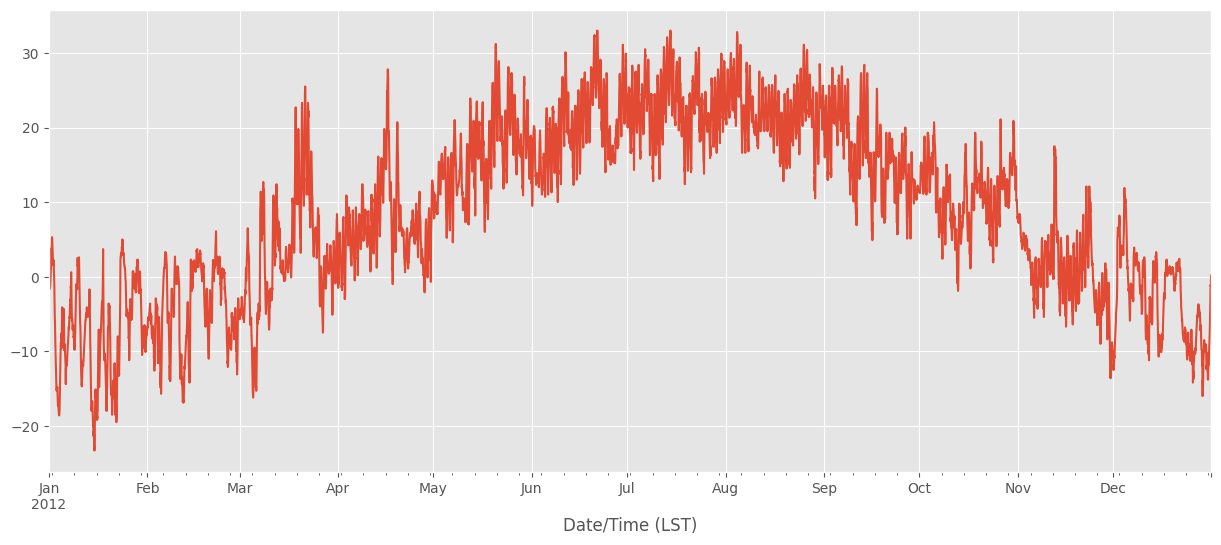

In [33]:
weather_2012['Temp (C)'].plot(figsize=(15, 6))

## Saving to a CSV

It's slow and unnecessary to download the data every time, so let's save our dataframe for later use!

In [34]:
weather_2012.to_csv('weather_2012_tmp.csv')

And we're done!